<a href="https://colab.research.google.com/github/junyanvv/junyanvv/blob/main/Python%20for%20public%20policy_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Executive Summary

In the competitive e-commerce landscape, understanding and segmenting customers is crucial for developing effective marketing strategies and maximizing profitability. This project addresses the research question: *How can we effectively segment 1,000 e-commerce users into distinct value and activity groups to inform targeted business tactics?*

To answer this, a two-stage data analysis approach was implemented using Python libraries such as Pandas, Scikit-learn, and Matplotlib.  
*   **Stage I** involved an enhanced Recency, Frequency, and Monetary (RFM) analysis to evaluate user value. This was augmented by creating a composite "Activity Score," a weighted index of standardized Recency and Frequency metrics, to provide a more nuanced view of user engagement.  
*   **Stage II** employed the K-Means clustering algorithm, an unsupervised machine learning technique, to segment the users into four distinct groups based on their monetary value and activity scores. The analysis successfully identified four key user personas: "High Value Champions," "Active but Low-Spending," "High-Spending but At-Risk," and "Low-Value/Churned."  

The results provide actionable insights for the business team, enabling the development of
tailored marketing campaigns aimed at retaining high-value customers, nurturing potential ones,
and re-engaging those at risk of churn.

# 1. Introduction

The rapid growth of the e-commerce sector has provided businesses with access to vast amounts of customer data. However, the true value of this data lies in the ability to extract actionable insights that drive strategic decision-making. One of the most powerful applications of customer data is **user segmentation**—the process of dividing a customer base into distinct groups based
on shared characteristics. By understanding the unique behaviors and value of different segments, a business can tailor its marketing efforts, improve customer retention, and optimize resource allocation.

The primary objective of this project is to classify a dataset of 1,000 e-commerce users into several meaningful categories. This segmentation will serve as a foundational tool for the business team to devise and implement targeted sales and marketing tactics. To achieve this, this paper outlines a two-stage analytical process.
*   The first stage utilizes an enhanced RFM
(Recency, Frequency, Monetary) model to assess the fundamental value of each customer.
*   The second stage builds upon this analysis by applying the K-Means clustering algorithm to identify deeper, behavior-based patterns within the user base.

This paper will detail the methodology employed, from data preprocessing to the implementation of the RFM and K-Means models. It will then present the results of the analysis, including a characterization of the identified user clusters. Finally, it will discuss the business implications of
these findings and provide concrete tactical recommendations for each segment, demonstrating the practical application of data science in a commercial context.

# 2. Dataset and Methodology

The analysis was performed on the ecommerce_user_behavior_dataset.csv, which contains behavioral and demographic data for 1,000 users downloaded from Kaggle. For this project, the focus was primarily on transactional data relevant to the RFM model. The key variables extracted for this analysis were:
*   Last_Login_Days_Ago: Used to calculate Recency.
*   Purchase_Frequency: Used to calculate Frequency.
*   Average_Order_Value: Used as the primary measure for Monetary value.
The project was executed in Python, leveraging several key libraries from the data science ecosystem, including Pandas for data manipulation, Scikit-learn for data scaling and clustering, and Matplotlib/Seaborn for data visualization.

# 2.1. Stage I: Enhanced RFM Value Analysis
The RFM model is a classic marketing analysis tool used to quantify customer value based on three key dimensions:
*   Recency (R): How recently a customer has made a purchase.
*   Frequency (F): How often a customer makes purchases.
*   Monetary (M): How much money a customer spends.

In this project, these metrics were calculated for each user by aggregating their transaction data. A crucial step was the creation of a composite Activity Score. Rather than treating Recency and Frequency as entirely separate dimensions for all analyses, they were combined into a single, weighted metric to represent overall user engagement.

This was achieved through the following steps:
1. **Standardization:** Recency and Frequency values were standardized using Scikit-learn's StandardScaler. This was essential to bring both metrics to a common scale with a mean of 0 and a standard deviation of 1, ensuring that neither metric disproportionately influenced the composite score due to differences in their original ranges.
2. **Weighted Combination:** A weighted score was calculated, assigning a 60% weight to Frequency and a 40% weight to Recency. This decision was based on the business logic that purchase frequency is a slightly stronger indicator of active engagement than recency alone.
3. **Categorization:** Based on this score, users were classified into three activity levels: "Active," "Potential," and "Churned."

# 2.2. Stage II: K-Means Clustering for Deeper Segmentation
While the RFM and Activity Scores provide a valuable high-level overview, a more granular segmentation was required to uncover subtle behavioral patterns. For this purpose, the K-Means clustering algorithm was employed. K-Means is an unsupervised learning algorithm that partitions a dataset into a predetermined number of clusters (k), where each data point belongs to the cluster with the nearest mean.

The following steps were taken:
1. **Feature Selection:** The two features chosen for clustering were the Monetary value (Average_Order_Value) and the newly created Activity Score. This combination was selected to segment users based on both their spending power and their level of engagement, providing a two-dimensional view of their behavior. This approach also avoids issues of multicollinearity that would arise from using all three raw RFM metrics or the combined RFM total score.
2. **Cluster Number (k):** For this analysis, the number of clusters was set to k=4. While methods like the Elbow Method or Silhouette Score [Daniel, 2020](https://www.atlantis-press.com/proceedings/siconian-19/125939938) are typically used to find an optimal k, this value was chosen for its ability to generate a manageable and interpretable number of distinct user personas, which aligns with the project's time constraints and business objective.
3. **Data Scaling:** Before applying the K-Means algorithm, the selected features were once again scaled using StandardScaler. This is a critical step for distance-based algorithms like K-Means, as it prevents features with larger scales from dominating the clustering process.
4. **Model Fitting and Visualization:** The K-Means model was fitted to the scaled data, assigning each of the 1,000 users to one of the four clusters. The results were then visualized using a scatter plot to illustrate the distinct segments.


# 3. Results and Discussion
The two-stage analysis yielded clear and actionable user segments.

# 3.1. Activity Score Distribution
The distribution of the composite Activity Score was approximately normal, centered around zero. The categorization based on this score revealed three groups: users with high scores were labeled "Active," those with scores near the mean were "Potential," and those with significantly negative scores were "Churned" or at risk. This initial classification already provided a useful
lens for viewing user engagement.

# 3.2. K-Means Cluster Profiles
The K-Means clustering algorithm successfully partitioned the users into four distinct groups, as shown in the scatter plot visualization. By analyzing the centroids and characteristics of each cluster in terms of their Monetary and Activity Scores, we can define four key user personas:
*   **Cluster 0: Low-Value / Churned Users.** This group is characterized by both a low Monetary score and a low (often negative) Activity Score. These are users who have not logged in recently, purchase infrequently, and spend little. They represent a significant portion of the user base but contribute minimally to revenue.

➢ **Business Tactic:** For this segment, high-cost marketing efforts are likely to have a low return on investment. The focus should be on low-cost, automated re-engagement campaigns (e.g., "we miss you" emails) or simply placing them on a low-priority list.

*   **Cluster 1: Active but Low-Spending Users.** This group exhibits a high Activity Score but a low Monetary score. These users are engaged—they log in frequently and make regular purchases—but their average order value is low. They are interested in the platform but are not high spenders.

➢ **Business Tactic:** This segment represents a significant opportunity for growth. Strategies should focus on increasing their average order value. This can be achieved through product recommendations, bundling offers ("buy X and Y together for a discount"),or promotions that reward larger purchases (e.g., free shipping over a certain threshold).

*   **Cluster 2: High-Value Champions.** This is the most valuable segment, characterized by both high Monetary and high Activity Scores. These users spend a lot of money and are highly engaged. They are the business's best customers.

➢ **Business Tactic:** The primary goal for this group is retention and advocacy. They should be targeted with loyalty programs, exclusive access to new products, personalized offers, and requests to write reviews or refer friends. It is critical to ensure they have a consistently positive experience.

*   **Cluster 3: High-Spending but At-Risk Users.** This group has a high Monetary score but a low Activity Score. These are "hibernating whales"—customers who have spent a significant amount in the past but have become less active. They are valuable but are at risk of churning.

➢ **Business Tactic:** This segment requires proactive re-engagement efforts. Personalized campaigns based on their past purchase history, special promotions to entice them back, or notifications about new items in their preferred categories can be highly effective. The goal is to remind them of the value they previously found on the platform.

# 4. Conclusion and Limitations
This project successfully demonstrated the power of a two-stage segmentation approach in an ecommerce context. By first applying an enhanced RFM model to create a composite Activity Score and then using K-Means clustering, we were able to move beyond a simple value-based ranking and identify four distinct, behaviorally-driven user segments. The resulting personas provide the business team with a clear framework for developing targeted and efficient marketing strategies.

However, this analysis has several limitations. The choice of k=4 for the clustering was predetermined for simplicity and a more rigorous approach would involve empirical methods to determine the optimal number of clusters. Furthermore, the weights for the Activity Score were heuristically assigned. Future work could explore more data-driven methods for weighting these
components or incorporate additional behavioral variables (e.g., time spent on site, pages viewed) into the clustering model.


In [1]:
import pandas as pd
import numpy as np

To access files from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Python/ecommerce_user_behavior_dataset.csv'
original_data = pd.read_csv(file_path, header=0, skiprows=[1], encoding="gbk")
original_data.head()

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True


After uploading, you can read the CSV file into a DataFrame:

In [ ]:
def composit_means(namelist,weight_list,group):
    """
    namelist is a list of column names requiring weighting.
    weight_list contains the corresponding weights for each column value (index-matched, i.e., the weight for element namelist[a] is weight_list[a]).
    group is the dataset requiring custom weighting, which must be applied after grouping.
    """
    if len(namelist)!=len(weight_list):
        Error1="Error,check the whether namelist and weight list has the same dimensions"
        return Error1
    if sum(weight_list)!=1:
        Error2="Error, check whether your weight_list has a sum of 1"
        return Error2
    weightedsum=0
    for name, weight in zip(namelist,weight_list):
        weightedsum+=np.log(group[name].mean())*weight
    return weightedsum

In [ ]:
#RFM computing
RFM=original_data.groupby("User_ID").agg({"Last_Login_Days_Ago": "mean","Purchase_Frequency":"sum","Average_Order_Value":"sum"
                                          }).rename(columns={"Last_Login_Days_Ago":"Recency","Purchase_Frequency":"Frequency"
                                                            ,"Average_Order_Value":"Monetary"})
RFM["Recency"]=-RFM["Recency"]
print(RFM)

         Recency  Frequency  Monetary
User_ID                              
#1          -5.0          7        18
#10        -13.0          8        61
#100        -9.0          7        92
#1000      -12.0          7       175
#101       -29.0          5        51
...          ...        ...       ...
#995       -10.0          1        60
#996       -18.0          7        83
#997       -16.0          3       180
#998        -8.0          8       130
#999        -1.0          3       152

[1000 rows x 3 columns]


Next,we will conduct scoring and classification analysis based on the simplest RFM model.

In [ ]:
#Simple Categorization
#Rating
RFM["R_score"]=pd.qcut(RFM["Recency"],q=5,labels=[1,2,3,4,5])
RFM["F_score"]=pd.qcut(RFM["Frequency"],q=5,labels=[1,2,3,4,5])
RFM["M_score"]=pd.qcut(RFM["Monetary"],q=5,labels=[1,2,3,4,5])
RFM["total_score"]=RFM["R_score"].astype(int) + RFM["F_score"].astype(int) + RFM["M_score"].astype(int)
print(RFM)

         Recency  Frequency  Monetary R_score F_score M_score  total_score
User_ID                                                                   
#1          -5.0          7        18       5       4       1           10
#10        -13.0          8        61       3       4       2            9
#100        -9.0          7        92       4       4       3           11
#1000      -12.0          7       175       4       4       5           13
#101       -29.0          5        51       1       3       2            6
...          ...        ...       ...     ...     ...     ...          ...
#995       -10.0          1        60       4       1       2            7
#996       -18.0          7        83       2       4       2            8
#997       -16.0          3       180       3       2       5           10
#998        -8.0          8       130       4       4       4           12
#999        -1.0          3       152       5       2       4           11

[1000 rows x 7 columns]


In [ ]:
#Classify based on total score into categories (high-value, low-value, medium-value classifications)
def value_classify_rfm(row):
    if row["total_score"] >= 12:
        return "High Value"
    elif row["total_score"] >= 8:
        return "Medium Value"
    else:
        return "Low Value"
RFM["value_Classify"] = RFM.apply(value_classify_rfm, axis=1)

In [ ]:
# Perform activity score calculation using two dimensions: recency and frequency.
# The recency dimension carries a weight of 40%, while the frequency dimension carries a weight of 60%.
from sklearn.preprocessing import StandardScaler

# Directly use the Recency and Frequency columns in RFM
user_activity = RFM[["Recency", "Frequency"]].copy()

# Data visualization
scaler = StandardScaler()
user_activity_scaled = scaler.fit_transform(user_activity)

# Weighted Portfolio:Recency 40%, Frequency 60%
RFM["Activity_Score"] = (user_activity_scaled[:, 0] * 0.4 +
                         user_activity_scaled[:, 1] * 0.6)

print(f"Activity_Score range: {RFM['Activity_Score'].min():.2f} to {RFM['Activity_Score'].max():.2f}")


Activity_Score range: -1.63 to 1.64


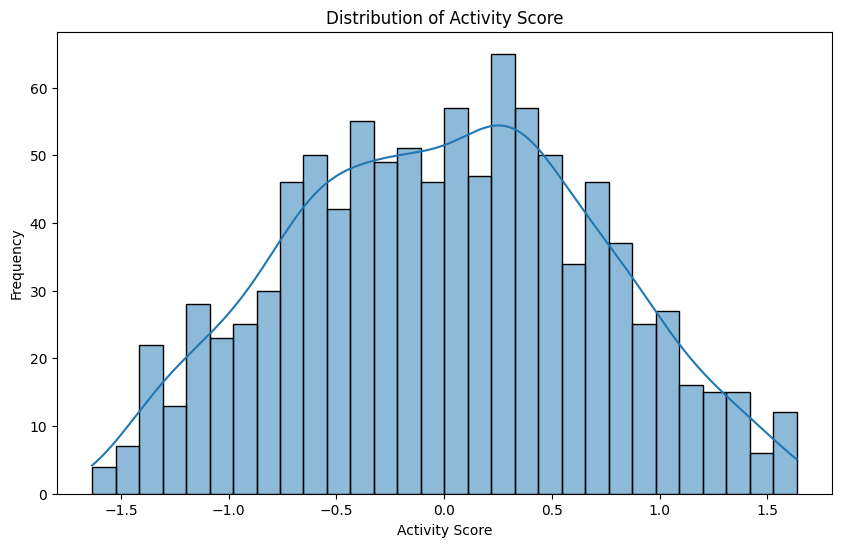

In [ ]:
# Perform visualization and draw a distribution chart.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(RFM['Activity_Score'], bins=30, kde=True)
plt.title('Distribution of Activity Score')
plt.ylabel('Frequency')
plt.xlabel("Activity Score")
plt.show()

In [ ]:
# Classify Activity Levels
def activity_classify(row):
    if row["Activity_Score"] >= 0.5:
        return "Active"
    elif row["Activity_Score"] >= -0.5:
        return "Potential"
    else:
        return "Churned"
RFM["Activity_Classify"] = RFM.apply(activity_classify, axis=1)
print(RFM)

         Recency  Frequency  Monetary R_score F_score M_score  total_score  \
User_ID                                                                      
#1          -5.0          7        18       5       4       1           10   
#10        -13.0          8        61       3       4       2            9   
#100        -9.0          7        92       4       4       3           11   
#1000      -12.0          7       175       4       4       5           13   
#101       -29.0          5        51       1       3       2            6   
...          ...        ...       ...     ...     ...     ...          ...   
#995       -10.0          1        60       4       1       2            7   
#996       -18.0          7        83       2       4       2            8   
#997       -16.0          3       180       3       2       5           10   
#998        -8.0          8       130       4       4       4           12   
#999        -1.0          3       152       5       2       4   

Next,we perform further K-means clustering and visualization based on on Monetary and Activity Scores. The reason for not using total score is that the total score incorporates information from the Activity Score, resulting in strong collinearity that would lead to poor classification performance.

In [ ]:
# Sklearn
from sklearn.cluster import KMeans
X=RFM[["Monetary","Activity_Score"]].values
k_means_scaler=StandardScaler()
# Standardization: preventing classification inaccuracies caused by order-of-magnitude issues.
# (i.e., only one axis can be considered for classification)
scaled_X=k_means_scaler.fit_transform(X)
kmeans=KMeans(n_clusters=4, random_state=42)
RFM["Cluster"] = kmeans.fit_predict(scaled_X)
print(RFM)

         Recency  Frequency  Monetary R_score F_score M_score  total_score  \
User_ID                                                                      
#1          -5.0          7        18       5       4       1           10   
#10        -13.0          8        61       3       4       2            9   
#100        -9.0          7        92       4       4       3           11   
#1000      -12.0          7       175       4       4       5           13   
#101       -29.0          5        51       1       3       2            6   
...          ...        ...       ...     ...     ...     ...          ...   
#995       -10.0          1        60       4       1       2            7   
#996       -18.0          7        83       2       4       2            8   
#997       -16.0          3       180       3       2       5           10   
#998        -8.0          8       130       4       4       4           12   
#999        -1.0          3       152       5       2       4   

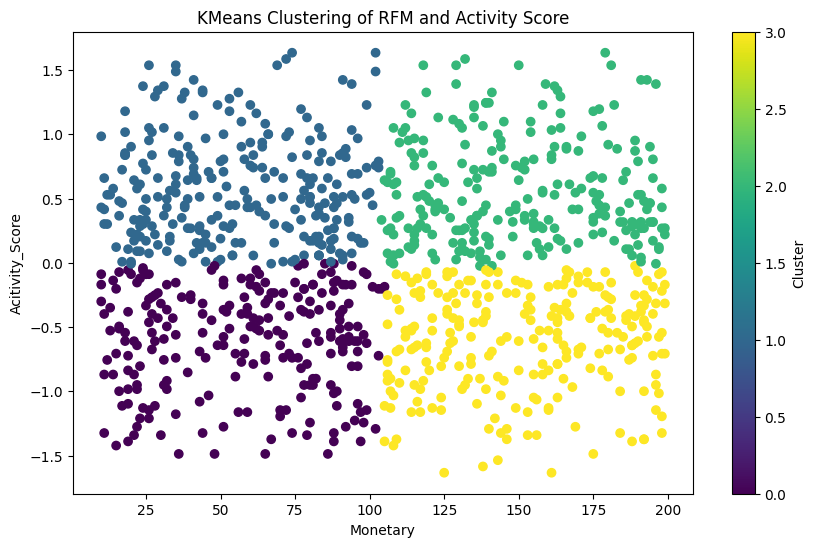

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(RFM['Monetary'], RFM['Activity_Score'],c=RFM["Cluster"],cmap='viridis')
plt.title('KMeans Clustering of RFM and Activity Score')
plt.ylabel("Acitivity_Score")
plt.xlabel("Monetary")
plt.colorbar(label="Cluster")
plt.show()